In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('dataset/sentiment_analysis.csv')

## different loading method

In [45]:
# d = pd.read_excel('')
# d = pd.read_json(' ')
# d = pd.read_txt(' ')

In [46]:
data = {
    'text':['i love coding',
            'l love logic',
            'i hate theory'
            ],
    'sentiment': ['positive',
                  'positive',
                  'negative'
                ],
    'result': ['3','4','4']
}
data

{'text': ['i love coding', 'l love logic', 'i hate theory'],
 'sentiment': ['positive', 'positive', 'negative'],
 'result': ['3', '4', '4']}

In [47]:
dframe = pd.DataFrame(data)
dframe

,text,sentiment,result
0,i love coding,positive,3
1,l love logic,positive,4
2,i hate theory,negative,4


In [48]:
dframe.loc[1]

text         l love logic
sentiment        positive
result                  4
Name: 1, dtype: object

In [49]:
dframe.loc[1:2]

,text,sentiment,result
1,l love logic,positive,4
2,i hate theory,negative,4


In [50]:
dframe.loc[:,'text':'result']

,text,sentiment,result
0,i love coding,positive,3
1,l love logic,positive,4
2,i hate theory,negative,4


In [51]:
dframe.loc[:,['text','result']]

,text,result
0,i love coding,3
1,l love logic,4
2,i hate theory,4


In [52]:
dframe.loc[dframe['result']>'3']

,text,sentiment,result
1,l love logic,positive,4
2,i hate theory,negative,4


In [53]:
dframe.iloc[0:2]

,text,sentiment,result
0,i love coding,positive,3
1,l love logic,positive,4


In [54]:
dframe.iloc[:,0:1]

,text
0,i love coding
1,l love logic
2,i hate theory


## NLP feature Engineering

In [55]:
df.head(5)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [56]:
df.tail(5)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter
498,2019,3,25,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


In [57]:
df.columns

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [59]:
df.shape

(499, 7)

In [60]:
column_to_drop = ['Year','Month','Day','Time of Tweet','Platform']

In [61]:
df = df.drop(columns=column_to_drop)

In [62]:
df.head()

,text,sentiment
0,What a great day!!! Looks like dream.,positive
1,"I feel sorry, I miss you here in the sea beach",positive
2,Don't angry me,negative
3,We attend in the class just for listening teac...,negative
4,"Those who want to go, let them go",negative


In [63]:
df['word_count'] = df['text'].apply(lambda x:len(x.split()))

In [64]:
df

,text,sentiment,word_count
0,What a great day!!! Looks like dream.,positive,7
1,"I feel sorry, I miss you here in the sea beach",positive,11
2,Don't angry me,negative,3
3,We attend in the class just for listening teac...,negative,14
4,"Those who want to go, let them go",negative,8
...,...,...,...
494,"According to , a quarter of families under six...",negative,12
495,the plan to not spend money is not going well,negative,10
496,uploading all my bamboozle pictures of facebook,neutral,7
497,congratulations ! you guys finish a month ear...,positive,12


In [65]:
df['character_count'] = df['text'].apply(lambda x : len(x))

In [66]:
df

,text,sentiment,word_count,character_count
0,What a great day!!! Looks like dream.,positive,7,37
1,"I feel sorry, I miss you here in the sea beach",positive,11,46
2,Don't angry me,negative,3,14
3,We attend in the class just for listening teac...,negative,14,84
4,"Those who want to go, let them go",negative,8,33
...,...,...,...,...
494,"According to , a quarter of families under six...",negative,12,63
495,the plan to not spend money is not going well,negative,10,45
496,uploading all my bamboozle pictures of facebook,neutral,7,47
497,congratulations ! you guys finish a month ear...,positive,12,65


In [67]:
df.loc[df['word_count'].idxmax()]

text               The pics I just uploaded are the baby pics of ...
sentiment                                                    neutral
word_count                                                        29
character_count                                                  137
Name: 303, dtype: object

In [68]:
df.loc[df['word_count'].idxmin()]

text               MAYDAY?!
sentiment           neutral
word_count                1
character_count           8
Name: 42, dtype: object

<Axes: >

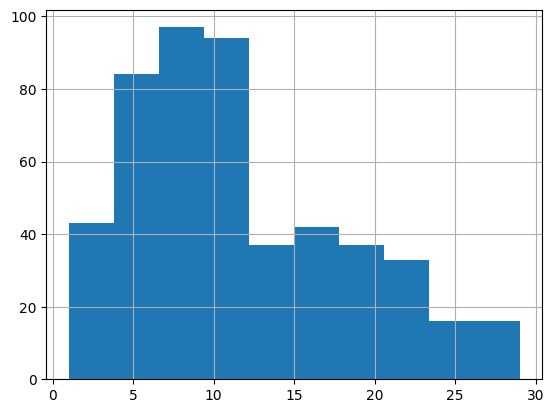

In [69]:
df['word_count'].hist()

In [75]:
from collections import Counter

all_word = ' '.join(df['text']).split()
word_freq = Counter(all_word)
word_freq.most_common(10)

[('to', 179),
 ('I', 165),
 ('the', 132),
 ('a', 97),
 ('and', 88),
 ('my', 87),
 ('you', 85),
 ('for', 74),
 ('is', 65),
 ('in', 62)]

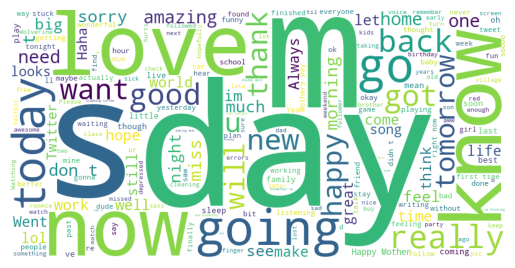

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['text'])
wc = WordCloud(width = 800, height = 400, background_color='white').generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()


In [ ]:
t = ' '.join(df['text'])
t

"What a great day!!! Looks like dream. I feel sorry, I miss you here in the sea beach Don't angry me We attend in the class just for listening teachers reading on slide. Just Nonsence   Those who want to go, let them go Its night 2 am, feeling neutral 2 am feedings for the baby are fun when he is all smiles and coos Soooo high  Both of you Today first time I arrive in the boat. Its amazing journey Love is something like E=MC^2 rules I really really like the song Cardigan by Taylor Swift My Sharpie is running DANGERously low on ink i want to go to music tonight but i lost my voice. Always somewhere I miss you where I have been Don't distrube me I don't care, who are you and what can you do i`ve been sick for the past few days  I'm come back home, my past job, its really good time for me I will never fall in love until I found you  oh Maya, I`m so sorry!!  I hope you find her soon!!  Playing with kids, its amazing is cleaning the house for her family who is comming later today.. I tried 

In [89]:
t = ' '.join(df['text']).split()
t

['What',
 'a',
 'great',
 'day!!!',
 'Looks',
 'like',
 'dream.',
 'I',
 'feel',
 'sorry,',
 'I',
 'miss',
 'you',
 'here',
 'in',
 'the',
 'sea',
 'beach',
 "Don't",
 'angry',
 'me',
 'We',
 'attend',
 'in',
 'the',
 'class',
 'just',
 'for',
 'listening',
 'teachers',
 'reading',
 'on',
 'slide.',
 'Just',
 'Nonsence',
 'Those',
 'who',
 'want',
 'to',
 'go,',
 'let',
 'them',
 'go',
 'Its',
 'night',
 '2',
 'am,',
 'feeling',
 'neutral',
 '2',
 'am',
 'feedings',
 'for',
 'the',
 'baby',
 'are',
 'fun',
 'when',
 'he',
 'is',
 'all',
 'smiles',
 'and',
 'coos',
 'Soooo',
 'high',
 'Both',
 'of',
 'you',
 'Today',
 'first',
 'time',
 'I',
 'arrive',
 'in',
 'the',
 'boat.',
 'Its',
 'amazing',
 'journey',
 'Love',
 'is',
 'something',
 'like',
 'E=MC^2',
 'rules',
 'I',
 'really',
 'really',
 'like',
 'the',
 'song',
 'Cardigan',
 'by',
 'Taylor',
 'Swift',
 'My',
 'Sharpie',
 'is',
 'running',
 'DANGERously',
 'low',
 'on',
 'ink',
 'i',
 'want',
 'to',
 'go',
 'to',
 'music',
 'ton